In [1]:
#A1
class Polygon:
    def __init__(self,sides):
        self.sides=sides
    def display_sides(self):
        print(f"This polygon has {self.sides} sides")
    def find_area(self):
        pass

class Triangle(Polygon):
    def __init__(self):
        super().__init__(3)
        self.side1=float(input("Enter the length of side1: "))
        self.side2=float(input("Enter the length of side2: "))
        self.side3=float(input("Enter the length of side3: "))

    def find_area(self):
        s=(self.side1+self.side2+self.side3)/2
        area=(s*(s-self.side1)*(s-self.side2)*(s-self.side3))**0.5
        return area

triangle=Triangle()
triangle.display_sides()
area=triangle.find_area()
print(f" The area of the triangle is:{area}")

Enter the length of side1:  21
Enter the length of side2:  21
Enter the length of side3:  23


This polygon has 3 sides
 The area of the triangle is:202.06975899426416


In [ ]:
#A3
import numpy as np
def get_student_info():
    name=input("Enter a student name: ")
    height=float(input("Enter a student height: "))
    class_num=int(input("Enter student class:"))
    return name,height,class_num

num_students=int(input("Enter the number of students: "))
dtypes=[('name','U20'),('height',float),('class',int)]
students_array=np.empty(num_students,dtype=dtypes)

for i in range(num_students):
    print(f"\n Enter information for student{i+1}:")
    students_array[i]=get_student_info()
print("\n Original Array:")
print(students_array)

sorted_students_array = np.sort(students_array,order='height')
print("\n Sorted Array based on height:")
print(sorted_students_array)

In [3]:
#A2 (a)
import re
text="xyz@gmail.com and 999@99ad.com and abc_987@vvce.ac.in are the mail id's,(897)-012-3456 ext.23 and 897-0123456x23 are numbers."
pattern=re.compile('[a-zA_Z0-9._]+@[a-zA-Z0-9,-]+[.][a-zA-Z]{2,4}')
email=pattern.findall(text)
for email in email:
    print(email)

xyz@gmail.com
999@99ad.com
abc_987@vvce.ac


In [1]:
#A2 (b)
import re
p=input("Input your password:")
if len(p)>5 and len(p)<17 and re.search('[a-z]',p) and re.search('[A-Z]',p) and re.search('[0-9]',p) and re.search('[$#@_]',p):
    print("Valid password")
else:
    print("Invalid Password")

Input your password: oajoI@123


Valid password


In [1]:
#C1
class Employee:
    count = 0 
    def __init__(self):
        self.name = None
        self.place = None
        self.department = None
        Employee.count += 1
        self.eid = 'Emp' + str(Employee.count)

    def update(self):
        self.name = input("Enter name: ")
        self.place = input("Enter place: ")
        self.department = input("Enter dept: ")

    def display(self):
        print("Employee ID:", self.eid)
        print("Employee Name:", self.name)
        print("Employee Place:", self.place)
        print("Employee Dept:", self.department)
        print("-" * 30)

n = int(input("Enter total number of Employees: "))
employees = [] 
for i in range(n):
    emp = Employee()
    emp.update()
    employees.append(emp)
print("\nEmployee Details: \n")
for emp in employees:
    emp.display()

Enter total number of Employees:  2
Enter name:  name
Enter place:  place
Enter dept:  dept
Enter name:  name
Enter place:  place1
Enter dept:  dept1



Employee Details: 

Employee ID: Emp1
Employee Name: name
Employee Place: place
Employee Dept: dept
------------------------------
Employee ID: Emp2
Employee Name: name
Employee Place: place1
Employee Dept: dept1
------------------------------


In [9]:
#B1:FremontBridge
import pandas as pd
data  = pd.read_csv('FremontBridge.csv',index_col='Date',parse_dates=True)
#index column is a time series object
data.columns=['Total','East','West']
data.head()

/var/folders/n4/0rn15kfn6f71pxzsn6rsl7500000gn/T/ipykernel_82063/950650543.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data  = pd.read_csv('FremontBridge.csv',index_col='Date',parse_dates=True)


,Total,East,West
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


           Total       East       West
Date                                  
0     114.783500  48.273983  66.509517
1     128.815423  53.299548  75.515875
2     128.147197  53.387303  74.759893
3     122.210807  50.764016  71.446791
4     107.896423  45.888494  62.007928
5      69.274237  31.912977  37.361260
6      64.804622  30.237395  34.567227


<Axes: >

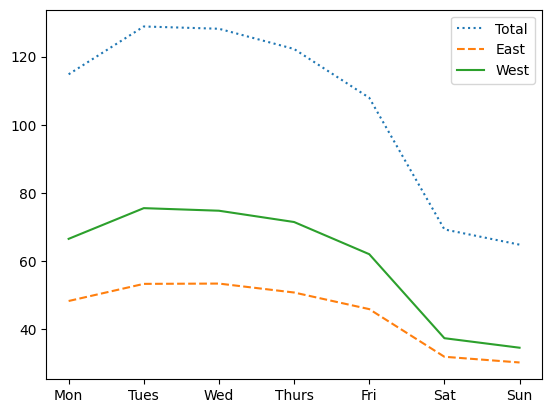

In [3]:
#i)Average daily count:
avg_count=data.groupby(data.index.dayofweek).mean()
print(avg_count)
avg_count.index=['m','t','we','th','f','s','su']
avg_count.plot(style=[':','-','--'])

<Axes: title={'center': 'WeekendBicycleCounts'}, xlabel='Date'>

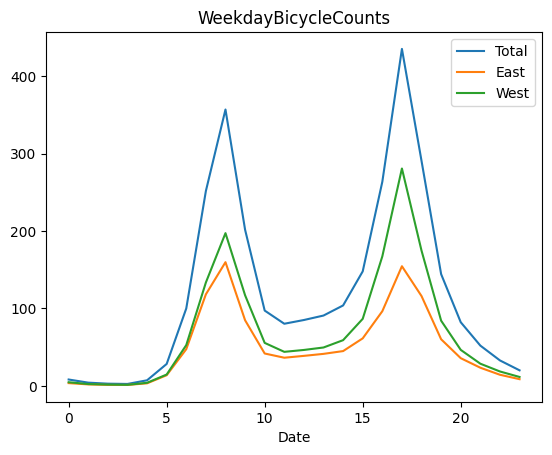

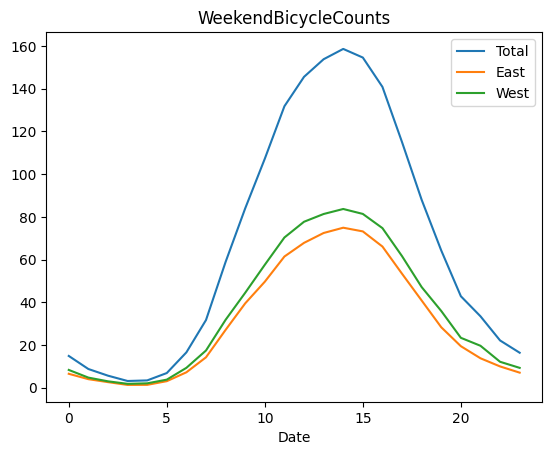

In [11]:
#ii)average hourly count on weekends and weekdays
import numpy as np
import matplotlib.pyplot as plt
weekend_arr=np.where(data.index.dayofweek<5,'Weekend','Weekday')
bytime=data.groupby([weekend_arr,data.index.hour]).mean()
bytime.loc['Weekend'].plot(title='Weekend')
bytime.loc['Weekday'].plot(title='Weekday')

In [12]:
#B2:Births
import pandas as pd
data = pd.read_csv('births.csv')
data.head()
print(data.columns)

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')


Text(0, 0.5, 'total births per year')

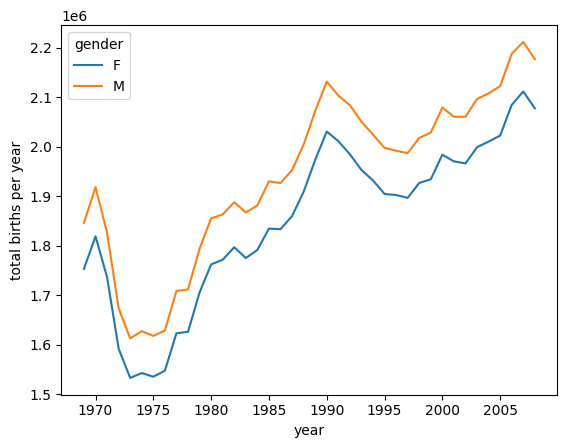

In [18]:
#i)Total number of US births by year and gender
data.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year')


In [16]:
#ii)Average daily births by day of week and decade
# Create a date column
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Extract day of week and decade
data['day_of_week'] = data['date'].dt.day_name()
data['decade'] = (data['year'] // 10) * 10

# Group by decade and day of week, then get average births
avg_daily_births = data.groupby(['decade', 'day_of_week'])['births'].mean().reset_index()

print("\nAverage daily births by day of week and decade:")
print(avg_daily_births)


ValueError: cannot assemble the datetimes: unconverted data remains when parsing with format "%Y%m%d": "9", at position 31. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
#A4. Read the given data “churn.csv” and save it as a dataframe called churn_data.
Perform following operations on the dataframe 
i) Count total number of duplicate records in the dataframe 
ii) Count the no. of duplicate records in the churn dataframe based on the cutomerID column 
iii) Count number of missing values in each columns
iv) Count the total no. of missing values for the variable TotalCharges 
v) Average monthly charge paid by a customer for the services he/she has signed up for 
vi)Display the records having “1@#” under the variable Dependents 
vii) Replace null values in churn dataframe by median value or by max count class category
(https://drive.google.com/file/d/1JSYGIIkIZr4jyheDEH0X1_TMSnQ2CzXc/view)

In [2]:
#A4
import pandas as pd
df=pd.read_csv('churn.csv')
print(df)

     Unnamed: 0  customerID tenure        Contract PaperlessBilling  \
0             1  8260-NGFNY    One  Month-to-month               No   
1             2  2359-QWQUL     39        One year              Yes   
2             3  6598/RFFVI      2        One year               No   
3             4  IXSTS-8780      6  Month-to-month              Yes   
4             5  2674/MIAHT   Four  Month-to-month              Yes   
..          ...         ...    ...             ...              ...   
252         253  9318-NKNFC    One  Month-to-month              Yes   
253         254  9067-SQTNS     44        One year               No   
254         255  9067-SQTNS     44        One year               No   
255         256  9067-SQTNS     44        One year               No   
256         257  9067-SQTNS     44        One year               No   

                 PaymentMethod  MonthlyCharges  TotalCharges  gender  \
0                 Mailed check           25.20         25.20  Female   
1  

In [3]:
#(i)
duplicate_count=df.duplicated().sum()
print(duplicate_count)

0


In [4]:
#(ii)
duplicate_customer_id=df['customerID'].duplicated().sum()
print(f"Number of Duplicate Records based on 'customerID' column:{duplicate_customer_id}")

Number of Duplicate Records based on 'customerID' column:7


In [5]:
#(iii)
missing_values_per_column=df.isnull().sum()
print(f"Number of missing values in each column:{missing_values_per_column}")

Number of missing values in each column:Unnamed: 0           0
customerID           0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges        15
gender               0
SeniorCitizen        5
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Churn                0
dtype: int64


In [6]:
#(iv)
missing_values_TotalCharges=df['TotalCharges'].isnull().sum()
print(f"Number of missing values in 'Total Charges':{missing_values_TotalCharges}")

Number of missing values in 'Total Charges':15


In [7]:
#(v)
average_monthly_charge=df['MonthlyCharges'].mean()
print(f"Average MonthlyCharges:{average_monthly_charge}")

Average MonthlyCharges:62.47348178137652


In [9]:
#(vi)
filtered_records=df[df['Dependents']=="1@#"]
print(f"Records with 'Dependents' equal to '1@#':{filtered_records}")

#Alter
filtered_records1=df.query('Dependents =="1@#" ')
print(f"Records with 'Dependents' equal to '1@#':{filtered_records1}")

Records with 'Dependents' equal to '1@#':     Unnamed: 0  customerID tenure        Contract PaperlessBilling  \
89           90  1754-GKYPY     22  Month-to-month              Yes   
125         126  9108-EQPNQ     10        Two year               No   
174         175  2640-PMGFL     27  Month-to-month              Yes   
220         221  8854-CCVSQ     18  Month-to-month              Yes   
234         235  6876-ADESB    One  Month-to-month               No   
238         239  1972-XMUWV     65        Two year              Yes   

                 PaymentMethod  MonthlyCharges  TotalCharges  gender  \
89   Bank transfer (automatic)           89.75       1938.90    Male   
125    Credit card (automatic)           26.10        225.55  Female   
174           Electronic check           79.50       2180.55    Male   
220           Electronic check           80.65       1451.90    Male   
234           Electronic check           48.95         48.95    Male   
238    Credit card (automatic

In [10]:
#(vii)
new_df=df.fillna(df.median(numeric_only=True))
new_df=new_df.fillna(df.mode().iloc[0])
print(new_df.isnull().sum())

Unnamed: 0          0
customerID          0
tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64


In [11]:
print("The original column is:")
print(new_df['MonthlyCharges'])
x=new_df['MonthlyCharges']
print("The replaced column is :")
x.replace(25.20,25)

The original column is:
0       25.20
1      104.70
2       19.30
3       90.10
4       80.30
        ...  
252     18.85
253     20.60
254     20.60
255     20.60
256     20.60
Name: MonthlyCharges, Length: 257, dtype: float64
The replaced column is :


0       25.00
1      104.70
2       19.30
3       90.10
4       80.30
        ...  
252     18.85
253     20.60
254     20.60
255     20.60
256     20.60
Name: MonthlyCharges, Length: 257, dtype: float64

In [3]:
#C2
import pandas as pd
import seaborn as sns
df = pd.read_csv('Automobile_data.csv', na_values=['?'])
print(df.head())
print(df.describe())
##
#(i)
sns.boxplot(x=df["num-of-doors"], y=df["horsepower"], hue=df["fuel-type"])
##
#(ii)
# Boxplot: Horsepower vs Body Style, grouped by Fuel Type
sns.boxplot(x=df["body-style"], y=df["horsepower"], hue=df["fuel-type"])
#
#(iii)
sns.countplot(x=df["body-style"], hue=df["fuel-type"])
#
#(iv)
# Catplot: Horsepower by Fuel Type, Number of Doors, and Drive Wheels
sns.catplot(
    x="fuel-type",y="horsepower",hue="num-of-doors",col="drive-wheels",data=df,kind="box"
)
#(v)
# Boxplot: Horsepower vs Fuel Type, grouped by Drive Wheels
sns.boxplot(x=df['fuel-type'], y=df['horsepower'], hue=df['drive-wheels'])

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1000)>